In [1]:
import h5py
import matplotlib.pyplot as plt
from tqdm import tqdm
import copy
import numpy as np
from tqdm import tqdm

In [2]:
# 分布参数
limit = [
    [0.35, 1],
    [0.43, 1.434],
    [0.25, 1.24],
    [0.118, 0.9],
    [0.045, 0.6],
    [0.012, 0.36],
    [0.0026, 0.2],
    [0.0004, 0.1],
    [7.0e-5, 0.045],
    [5.6e-6, 0.019],
    [1.2e-7, 0.0067],
    [2e-9, 0.0023]
]
mu = [1,0.85,0.55,0.25,0.1,0.04,0.015,0.002,0.004,0,0,0]
sigma = [0.65,0.5,0.5,0.5,0.5,0.3,0.2,0.1,0.05,0.02,0.01,0.01]

In [3]:
# 正态分布
def gen_random(mean,scale,lim):
    while True:
        x = np.random.normal(mean,scale)
        if lim[0]< x <lim[1]:
            break
    return x

In [15]:
# 生成分布,500个需1小时
import gen_pic
r_list = []
label_list = []
pic_list = []
for j in tqdm(range(500)):
    beta1 = [0.5]
    for i in range(12):
        beta1.append(gen_random(mu[i],sigma[i],limit[i]))
    beta2 = [0.5]
    for i in range(12):
        beta2.append(gen_random(mu[i],sigma[i],limit[i]))
    r1 = np.random.uniform(0.3,0.9)
    r2 = np.random.uniform(0.3,0.9)

    r = np.array([min(r1,r2),max(r1,r2)],dtype=np.float64)
    label = np.array([beta1[1:],beta2[1:]],dtype=np.float64)

    # print(label)

    pic1 = gen_pic.gen_pic(beta1, r[0], np.random.uniform(0.005,0.009))
    pic2 = gen_pic.gen_pic(beta2, r[1], np.random.uniform(0.005,0.009))
    pic = (pic1+pic2)/2
    # print(pic.sum())
    # plt.imshow(pic)
    # plt.show()
    # print(beta)
    r_list.append(r) 
    label_list.append(label) 
    pic_list.append(pic) 
with h5py.File('dataset_my_double0.h5','w') as out:
    out['inputs'] = pic_list
    out['Rs'] = r_list
    out['labels'] = label_list


100%|██████████| 500/500 [1:00:30<00:00,  7.26s/it]


[5.00000000e-01 8.98275610e-01 9.24687048e-01 7.35301662e-01
 4.80154411e-01 2.71661200e-01 1.34136943e-01 5.78155374e-02
 2.17465672e-02 7.16174607e-03 2.06378560e-03 5.17576285e-04
 1.11723319e-04] 
 [5.00000000e-01 9.51318623e-01 1.12279713e+00 7.74878668e-01
 4.40743842e-01 2.18821344e-01 9.56628393e-02 3.72903099e-02
 1.30481131e-02 4.09156795e-03 1.13918900e-03 2.76802760e-04
 5.74232788e-05]


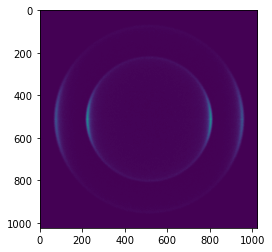

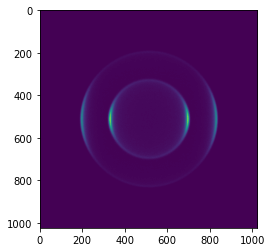

In [8]:
# 观察第二类训练集的参数所生成的图像
afafd = h5py.File('dataset_double.h5','r')
inp = afafd['inputs']
lab = afafd['labels']
l=500
beta1,beta2 = lab[l]
beta1 = np.concatenate(([0.5],beta1))
beta2 = np.concatenate(([0.5],beta2))
print(beta1,'\n',beta2)
plt.imshow(inp[l])
plt.show()

pic1 = gen_pic.gen_pic(beta1, r[0], 0.008)
pic2 = gen_pic.gen_pic(beta2, r[1], 0.007)
pic = (pic1+pic2)/2
plt.imshow(pic)
plt.show()
afafd.close()

In [14]:
# 观测第二类训练集分布
R_list = []
R_distri = np.zeros((50,))
for idx_of_traindata in [10,11,12,13,14,15,16,17,18,19]:
    traindata = h5py.File('train{}.h5'.format(idx_of_traindata),'r')
    # print(f'preparing train{idx_of_traindata}.h5')
    DistributionParameters = traindata['DistributionParameters'][:]
    R_min = 2
    R_max = -1
    
    for item in DistributionParameters:
        afdf = 11
        R_list.append(item[2])
        # R_distri[int(item[2]*50)] +=1
    
    # GeneratedElectrons = traindata['GeneratedElectrons'][:]
    # DetectedElectrons = traindata['DetectedElectrons'][:]
    traindata.close()
print(len(R_list))
print(max(R_list), min(R_list))  
print(R_distri)


1000
0.009482851715239344 0.005478989289043726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
